<a href="https://colab.research.google.com/github/ulukinhas/colabcodes/blob/main/NLP_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
from openai import OpenAI
import time
import numpy as np
import ast
import json
from sklearn.metrics import accuracy_score, precision_recall_fscore_support #Biblioteca para testar a acuraçia

# Limpeza e Filtragem

In [ ]:

# #lembrar de carregar o arquivo antes
# arquivo = '/content/basehidro.xlsx' #Carrega as abas do Google Planilhas no DataFrame
# lesson_df = pd.read_excel(arquivo, sheet_name='LESSONS LEARNT')
# events_df = pd.read_excel(arquivo, sheet_name='EVENTS')
# consequences_df = pd.read_excel(arquivo, sheet_name='CONSEQUENCES')

# # Definir as categorias de erro humano e não humano
# erro_humano = ["Job factors", "Human factors", "Management factors"]
# erro_nao_humano = ["System design error", "Material/ manufacturing error", "Installation error", "Environment"]
# qualidade = lesson_df[lesson_df["Q"] >= 3] #Deixa apenas as linhas onde a qualidade é >= 3
# df = pd.DataFrame(lesson_df)
# df_causas = pd.DataFrame(events_df)
# df_teste = events_df.dropna(subset=['Causes']).copy() #Remove as linhas vazias
# df_teste['Causas_IA'] = None

# #Salva os desconhecidos de causas
# desconhecidos_causa = df_causas['Causes'].isna() | (df_causas['Causes'].astype(str).str.strip().str.lower() == 'unknown')
# desconhecidos_causa_df = df_causas[desconhecidos_causa]

# #Começo do API para integrar a NOVITA ao codigo
# client = OpenAI(
#     base_url="https://api.novita.ai/v3/openai",
#     api_key="session_d68SAch-3qbO4O0_cYBxCEj6LEzmv1G4YwCcmvMJpFMTOutqALzrF76bz5tC5Q8y7XcYqFMVsTlDQpnjsPvBdA==") #Colocar a API KEY aqui

# #Loop que faz a API passar por todas as linhas do df
# for index, row in desconhecidos_causa_df.head(50).iterrows():
#         event_desc = row['Event full description']
#         response = client.chat.completions.create(
#                 model="deepseek/deepseek-v3-0324",
#                 messages=[{
#                     "role": "user",
#                     "content": f"""
# ### Role:
# You are an expert safety engineer and data analyst working for the European Union's energy commission. Your responsibility is to analyze hydrogen incident reports and classify the root cause of each event based on a predefined taxonomy.

# ### Input:
# The input is an **event_description** detailing a hydrogen-related accident or incident. Your analysis must be based on the following official **cause classification**:

# **1. Non-Human Causes:**
#    - **System design error**: Flaws inherent to the system's design.
#    - **Material/manufacturing error**: Failures due to defects in a component's material or manufacturing process.
#    - **Installation error**: Mistakes made during the assembly, installation, or commissioning.
#    - **Environment**: External factors like weather or foreign object impact.

# **2. Human Causes:**
#    - **Job factors**: Task-related issues like confusing procedures or lack of proper tools.
#    - **Human factors**: Direct operator errors like distraction, memory lapse, or procedural violation.
#    - **Management factors**: Systemic failures like lack of training, improper supervision, or a weak safety culture.

# ### Task:
# 1. Carefully read the provided `event_description`.
# 2. Determine which of the **seven predefined causes** is the most likely root cause.
# 3. Return **only the exact name** of the chosen category.

# ### Output Format:
# Return a **single string** containing the exact name of one of the seven causes. Do not add any explanations or extra formatting.

# ### Examples:
# - **event_description**: "The event occurred in a support building at a test stand complex. The explosion destroyed two support buildings and severely damaged a large amount of equipment. No one was injured. Gaseous hydrogen leaked into one of the support buildings from a high pressure hydrogen gas system consisting of two storage tanks and connecting pipes. A location at one pipe had been attacked by galvanic corrosion on the outer wall for some time, thinning the wall. However, the pipe was not routinely under pressure. Just before the explosion, an isolation valve failed open, permitting hydrogen under a pressure of ca. 30 MPa (4300 psig) to enter the pipe and break the thinned wall. Hydrogen from the two 19.8 cubic meter (700 cubic foot) tanks was released into one support building and into the next one. An electrical contact in a sump pump motor starter relay arced when the sump pump in the first building began an automatic start sequence. The electrical arc ignited the hydrogen in one building and this explosion apparently initiated an explosion in the other building."
# - **classified_cause**: System design error

# - **event_description**: "This resulted in the destruction of the building where the explosion occurred and claimed the lives of two people. The triggering event was a blowing out of a gasket in a water pump situated in a 100 m long, 10 m wide and 7 m high building. The pump fed water to a vessel that contained hydrogen gas at 30 bars. The pressure caused a back flow of water flow through the pump and out of the failed gasket. The hydrogen reached the leakage point after approximately 3 minutes. The discharge of gas lasted 20 - 30 seconds before the explosion. The total discharge of hydrogen inside the building was about 10 - 20 kg. Most likely a hot bearing ignited the gas cloud. The main explosion was very violent and it is likely that the gas cloud detonated. 3.5 - 7 kg of hydrogen must have been burning during the explosion.( No quantitative evidence that the cloud detonated, but from the damage observed, experience from other accidents and experiments detonation seems most likely). The roof of the building was lifted by an estimated 1.5 meters before resettling. The displacement of the roof caused a guillotine break of a 350 mm diameter pipe connected to the vessel that was the source of the original gas discharge. The gas composition in the vessel was 65 - 95 % hydrogen. This resulted in a large horizontal jet fire lasting about 30 seconds. Minor explosions occurred in the plant culvert system. The explosion caused large number of fragments representing a severe hazard. Glass windows were broken up to 700 m from the centre of the explosion. Within a radius of 100 m all ordinary windows were broken."
# - **classified_cause**: System design error

# - **event_description**: "In a chlorine electrolysis facility, a mixture of oxygen and hydrogen in one of the electrolyser cells a short-circuit ignited causing a deflagration. The cover of the cell was a thin plastic film which broke as planned. The production was stopped. According to the investigation, the inlet line of the electrolyte in the cell was blocked, which lead to an increase of the temperature in the cell and to the increase of oxygen production. On top of that, the alarm related to temperature control did not function."
# - **classified_cause**: Material/manufacturing error

# - **event_description**: "An explosion occurred a the Lurgi electrolysis unit of a chemical factory. The plant suffered extensive damage and one man died. The electrolysis plant produced hydrogen for process use and oxygen as a waste product by electrolysis of potassium hydroxide solution. The investigation concluded that the explosion probably occurred on the oxygen separating drum into which hydrogen had leaked. After the accident the company carried out a mass balance on the hydrogen flows just prior to the explosion and found that no less than 50% was unaccounted for. The ingress of hydrogen into the oxygen drum was apparently due to corrosion/erosion in the electrolysis cells. The internal breakdown of the cells had probably been initiated some time before the accident. On April 2, a cracking noise was heard in the cell block, which may have indicated minor explosions. There was a system of monitoring the purity of the hydrogen and oxygen streams by hourly gas analyses performed by the process operator. The evidence suggested that these analyses were not always carried out and that assumed values were entered in the process log. One operator stated that he only did the analyses two or three times in every 12 h. The report on the accident by the HSE (1976b) estimated that on the basis of the explosion damage, the 1690 l oxygen drum contained a 13.5% hydrogen, 86.5% oxygen mixture, and the explosion produced a shock wave equivalent to 22 kg of TNT. It was calculated that this explosion would have caused an overpressure of 1.03 kPa at 220 m and of 0.21 kPa at 660 m on an open site. The factory was in an urban area with houses 180 m and a school 210 m from the electrolysis plant. Although on an open site some damage might be expected from an explosion of the size described at these distances, none actually occurred. Probably this was due to the fact that the electrolysis plant was housed in a building designed and constructed to direct any blast upward."
# - **classified_cause**: Material/manufacturing error

# - **event_description**: "At 17:30 on 5 may 2019, the pipeline operator was notified by a third party that there was a possible leak on its hydrogen pipeline, as identified by sound. Operator personnel arrived on the site at 18:30 and confirmed that hydrogen was present in the area.  The location was in an isolated area.  Manual isolation valves were shut to close in the segment and it was manually blown down. At 08:52 on of the day after the operator determined that the incident met reportable criteria and called the national response centre at 09:22. Blowdown of the isolated segment was completed at 12:30 on 6 may 2019. There was no immediately recognizable cause of the incident.  No excavators were operating in the area, and cathodic protection (CP) testing showed no abnormalities.  The suspected area of the leak was excavated, but the pipe was shown to be in excellent condition.  Upon further investigation, it was determined that the leak was most likely located underneath a small non-navigable drainage canal.  Unable to excavate under the water, a new segment of pipe was installed, rerouting around the leak. The pipeline was put back into service on 6 days later."
# - **classified_cause**: Installation error

# - **event_description**: "A hydrogen leak took place on a trailer carrying compressed hydrogen, located inside the fenced perimeter of a hydrogen station. According to the company managing the hydrogen delivery and refuelling station, the leak did not pose any risk to people or the environment. A preliminary assessment  identified a faulty valve s source of the leak, but t was unclear a that time if it was a single defect or a systemic (i.e. design) problem. Following a detailed investigation in close cooperation with the trailer and valve suppliers, the company determined that the root cause of the valve malfunction was due to a set of improperly tightened bolts, causing an O-ring to burst."
# - **classified_cause**: Installation error

# - **event_description**: "Fire in chemical plant (Seveso-classified). The fire developed at the top of the flare stack of a during a violent thunderstorm. The flare stack is used to discharge hydrogen produced by the restarting of chlorine electrolysis cells. The fire was ignited despite steam and nitrogen had specifically were injected to prevent. it from occurring. The site’s firefighters cooled the flare stack while the technicians turned off the electrolysis cells to cut off the hydrogen feeding the flames. The electrolysis cells had been restarted following a power outage that had occurred earlier, at the start of the storm. The fire was extinguished after approximately 3 hours, and the electrolysis unit was restarted. According to the ARIA report (see references) steam and nitrogen are injected to dilute the hydrogen stream and raise the minimum ignition energy of the hydrogen-oxygen mixture. However, this does not altogether eliminate the risk of ignition, because the hydrogen remains above the minimum ignition concentration. A bolt of lightning to the flare stack was sufficient to start a fire."
# - **classified_cause**: Environment

# - **event_description**: "Fire due to hydrogen gas leakage."
# - **classified_cause**: Environment

# - **event_description**: "The explosion occurred in an incinerator for non-industrial wastes, during inspection and repair works. These were due to a large quantity of aluminium which produced a solid lump of ash. The explosion occurred during clean-up operation of this lump piled in a hopper chute at the lower part of the incinerator. In an attempt to favour the cleaning process, large quantities of were injected, which reacted with the aluminium to form flammable atmosphere consisting mainly of hydrogen. The hydrogen entered then in contact with air when the inspection door was opened, ignited and exploded."
# - **classified_cause**: Job factors

# - **event_description**: "The explosion occurred at the hydrogen producing unit of a refinery. A solution of potassium carbonate was being drawn off from an absorption tower to a temporary storage tank for a turnaround shutdown maintenance. The tank exploded, due to backflow of hydrogen into the tank.  The level of the solution in the tower was not checked. When a water solution in an absorption tower for carbonic acid gas is drawn off, the water level of the solution drops. This drop \\was ignored and the pump cavitated. Since the pump and a transfer valve were not shut down immediately, hydrogen in the absorption tower flowed into the tank. The hydrogen ignited in the tank, probably due to spark at the wall surface or the solution surface. The force of the flow blew off scales, coarse particulates, and solution in the tank. SEQUENCE. On May 23rd , 1996: operation was stopped. 7:05 on 24th; the shift changed. 7:30; a meeting about turnaround shutdown maintenance was held. About 8:00; the meeting finished and operators in charge of solution draw-off read out and collated an operation manual for twenty minutes. About 8:10; a potassium carbonate water solution started to be drawn off into an inventory tank. As a pump cavitation occurred, a delivery valve was adjusted, but the pump continued to cavitate, so the pump was stopped and draw-off work was also suspended. About 8:15; the tank exploded. Its roof was scattered around the sites of neighbouring offices, and office buildings and vehicles were damaged by a blast."
# - **classified_cause**: Job factors

# - **event_description**: "Chlorine was released in the liquefaction unit of a chlorine electrolysis plant, due to the rupture of a pipe. During the re-start phase of an electrolysis workshop in a chemical plant, chlorine (Cl2) gas leaked from a pipeline in a confined chlorine liquefaction unit, specifically at the pipeline carrying residual chlorine from the gas/liquid separator to a liquid bleach manufacturing plant. The leak took place when few tens of cm of this pipeline failed, due to the combustion of the pipeline steel by chlorine, which in turn was caused by the presence of hydrogen in the pipeline due to lack of monitoring. According to the rules, hydrogen concentration in the residual chlorine must remain below the 4.6 %vol value (the hydrogen low explosion limit, LEL).  It is manually controlled by the rate of evaporation of chlorine in the gas/liquid separator and monitored through analysis. During the accident, the technician failed to reduce the increasing hydrogen concentration in the pipeline that reached 6.7%, crossing the LEL. To bring down the concentration, the evaporation rate of chlorine was increased causing thus a rise in the residual chlorine flow rate. This probably provided the low energy needed to start combustion. The flame stabilised near a valve and a flow meter and caused the combustion of iron / chlorine when the temperature reached 130 °C."
# - **classified_cause**: Human factors

# - **event_description**: "The incident occurred in a hydrocracker unit of the refinery. A control valve on the liquid line between the high- and the low-pressure separators was opened in error and the liquid allowed to drain. High pressure hydrogen passed uncontrolled into the closed LP Separator which had limited pressure relief capacity. It over-pressurised rupturing at an estimated pressure of 50 bar. The explosion disintegrated the separator and also damaged other vessels and pipes. Released flammable substances were ignited resulting in jet-fires. The explosion occurred in the hydrocracker unit in which waxy oils reacted with hydrogen at high temperature and pressure in presence of a catalyst to form light petroleum spirits and gases (approximately 23 m3/h). The following substances were released from the LP separator after the explosion: hydrogen (1 tonne)). Petroleum Gases: (3 tonnes)), Hydrocarbon Liquids in released aerosol (10 tonnes)). The following substances were released from the nearby pipework and vessels damaged by the explosion: Light Petroleum Spirits ((190 tonnes). -Heavy Hydrocarbons Liquids (220 tonnes). 8 people were directly involved in the explosion and the subsequent fire (1 person was killed by explosion). The smoke from the fire did not affected the locality. The effects of the LP separator burst were equivalent to those of an explosion of 90 kg of TNT. The accident occurred because of an operator error (due to both the insufficient training of the operator and to the inappropriate procedures) in opening the control valve on the liquid line from the HP to the LP separator without noticing that the liquid contents in the HP vessel was draining away. Alarms did not operate because they had been previously disconnected without taking into account the decrease in safety. The main reason for the disconnection of the alarms was due to avoid operational difficulties because of the insufficient design capacity of the plant."
# - **classified_cause**: Human factors

# - **event_description**: "The vent occurred outside a fuel cells manufacturing facility. While preparing for transfer of liquid hydrogen from tanker truck to storage tank, a release of hydrogen occurred, which vaporised into a hydrogen cloud and ignited in a flash fire and concussion loud enough to be heard inside the nearby building (the building’s seismic event detectors went off).  A small amount of hydrogen gas continued to escape from the trailer tank and burn for almost eight hours, until a specialist of the truck delivery company arrived to manually shut off a critical valve. In the meantime, emergency response crews called to the scene sprayed water across the hydrogen tank as a precautionary cooling measure. As described in the PRESLHY report (see references), the driver had just terminated a first unloading of the tank. The manual valve connecting the trailer to stationary storage was apparently left in an open position after the first unloading. The driver next failed to perform the required procedure of seven purges intended to eliminate contaminants and water from the piping before connecting the hose for the second unloading. He then opened the pneumatic valve before connecting the hose, which, due to the open manual valve, resulted in a direct release of liquid hydrogen into the ambient air. The liquid immediately vaporized into a hydrogen cloud and quickly ignited."
# - **classified_cause**: Management factors

# - **event_description**: "Localized corrosion of a FCCU (Fluid Catalytic Cracking Unit) feed Hydrotreater recycle hydrogen line by-pass around a hydrogen pre-heat exchanger led to an explosion and fire. The failed part of the line had been identified by inspection as a dead leg.  After investigation it was found that the mechanism of corrosion was ammonium chloride under deposit corrosion. The source of chloride has not been traced, but hydrogen from the catalytic reformer was strongly suspected. Inadequate inspection of the dead leg was identified as the cause of this incident.  There was damage to equipment, material loss and product loss."
# - **classified_cause**: Management factors
# ---
# **FINAL INSTRUCTION**
# Based on all the information above, classify the following event:
# **event_description**: {event_desc}
# """
#                 }],

#             max_tokens=200,
#             temperature=0.3,
#             top_p=1,
#             presence_penalty=0,
#             frequency_penalty=0,
#             response_format={ "type": "text" },
#             extra_body={
#               "top_k": 50,
#               "repetition_penalty": 1,
#               "min_p": 0
#             },
#         )
#         classified_cause = response.choices[0].message.content.strip()
#         resultadoAPI = response.choices[0].message.content.strip()    #Resultado
#         df_causas.at[index, 'Causes'] = resultadoAPI  #Salva o df
#         time.sleep(5)

# df_causas_rag = df_causas[]
# df_causas_mtl = df_causas[]
# #Função para filtrar as lições
# def filtrar_lesson(lesson):
#     if pd.isna(lesson):
#       return False
#     if str(lesson).strip().lower() == 'unknown':
#       return False
#     return True


# df['Lesson Learnt'].str.replace('LESSON LEARNED', '')


# # Função para filtrar as causas
# def filtrar_causas(causas):
#     causas_lista = [causa.strip() for causa in causas.split(',')]
#     if "Unknown" in causas_lista:
#         return False
#     if len(causas_lista) == 1 in causas_lista: # and "Environment"
#         return False
#     return True


# # Função para verificar se uma linha das consequencias deve ser mantida
# def linha_valida(linha):
#     # Verifica se as colunas têm valores válidos
#     if pd.isna(linha['Number of fatalities']) or pd.isna(linha['Number of injured persons']):
#         return False  # Descarte se houver valor ausente
#     return True  # Mantenha caso contrário

# # Função para atribuir rótulos simplificados usando vetor binário
# def atribuir_rotulos(causas):
#     # Substituir "\n" por ", " para unificar o separador
#     causas = causas.replace('\n', ', ')

#     # Dividir em uma lista de causas
#     causas_lista = [causa.strip() for causa in causas.split(',')]

#     # Verificar se há erro humano ou não-humano
#     humano = any(causa in erro_humano for causa in causas_lista)
#     nao_humano = any(causa in erro_nao_humano for causa in causas_lista)
#     return [int(humano), int(nao_humano)]

# #categorias de consequencias
# def categorizar_consequencia(row):
#     dano_leve = 0
#     dano_grave = 0
#     if row['Number of fatalities']>0:
#       dano_grave = 1
#     if row['Number of injured persons']>0:
#       dano_leve = 1
#     return [dano_grave, dano_leve]

# qualidade['licoes'] = qualidade['Lesson Learnt'].apply(filtrar_lesson) #Aplica a filtragem de lição com a filtragem de qualidade já feita

# lesson_filtrado = qualidade[qualidade['licoes']]  #Usa a coluna auxiliar "licoes" para filtrar o df
# lesson_filtrado = lesson_filtrado.drop(columns=['licoes']) #Remove a coluna auxiliar "licoes" do df



session_ON9lo0ZD4_NMLF84aAKYFHzA2nLMG4VpJd5H7Xb0r7yAEaYu-PvLB-fkQEssxt_SlASNsNJly3IOPneVL8ux3g==

# Categorizando eventos com RAG

  -> Resposta do RAG: '**[1, 0], [0, 0]**'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '[0, 1], [0, 0]'
  -> Resposta do RAG: '**[1, 0], [0, 1]**'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[1, 1], [1, 0]**'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[1, 0], [1, 1]**'
  -> Resposta do RAG: '**[1, 0], [0, 0]**'
  -> Resposta do RAG: '[1, 0], [0, 0]'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[1, 0], [0, 0]**'
  -> Resposta do RAG: '[0, 1], [0, 0]'
  -> Resposta do RAG: '[1, 0], [0, 0]'
  -> Resposta do RAG: '**[0, 1], [0, 0]**'
  -> Resposta do RAG: '**[1, 0], [1, 1]**'
  -> Resposta do RAG: '**[1, 0], [0, 1]**'
  -> Resposta do RAG: '**[1, 0], [0, 1]**'
  -> Resposta do RAG: '**[1, 1], [1, 1]**'
  -> Resposta do RAG: '**[1

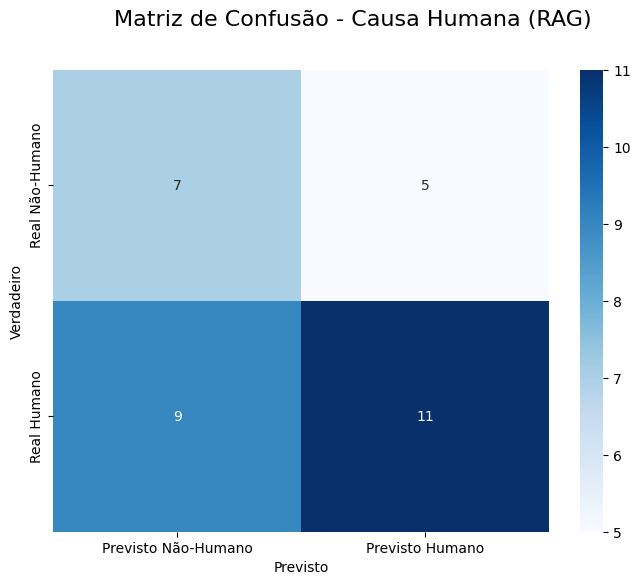

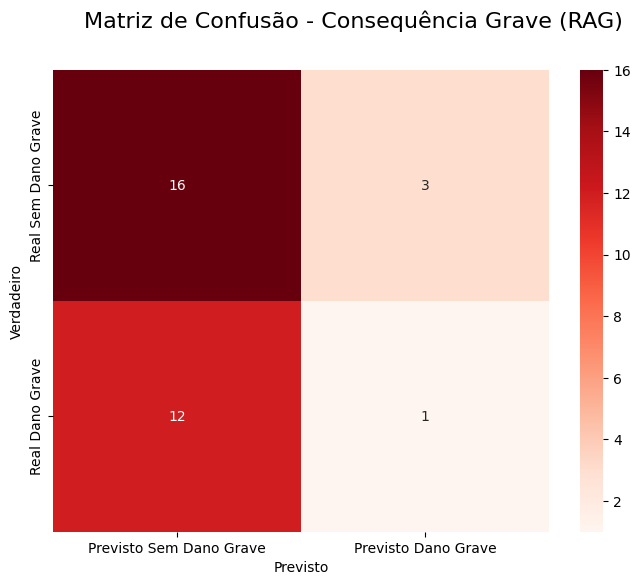

In [ ]:
import pandas as pd
from openai import OpenAI
import time
import re
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random
import torch

def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed_value)
set_seed(42)


df_treino = pd.read_excel('dados_treino.xlsx')
df_teste = pd.read_excel('dados_teste.xlsx')

descricao = 'text'
causa_real = 'label_cause'
conseq_real = 'label_consequence'
causa_rag = 'causa_predita_rag'
conseq_rag = 'dano_predito_rag'

df_teste[causa_rag] = None
df_teste[conseq_rag] = None


amostra_treino = df_treino.head(100)
contexto_lista = []

for index, row in amostra_treino.iterrows():
    exemplo = (
        f"Exemplo:\n"
        f"  Descrição: '{row[descricao]}'\n"
        f"  Resultado: {row[causa_real]}, {row[conseq_real]}"
    )
    contexto_lista.append(exemplo)
contexto_str = "\n\n".join(contexto_lista)

client = OpenAI(
    base_url="https://api.novita.ai/v3/openai",
    api_key="session_vSrfzd6OIj1V4vD23Szn0hH-5mV-XhAh3oNo1-JGnd2P2mv3xXZ1OvdA4TiICQYEAm44XAWELgZJhWJsvJjRIQ==",
)

for index, row in df_teste.iterrows():
    event_desc_teste = row[descricao]

    try:
        response = client.chat.completions.create(
            model="deepseek/deepseek-v3-0324",
            messages=[{
                "role": "user",
                "content": f"""
### Task:
You are an expert safety analyst. Your task is to analyze an incident description and return two binary list classifications.

### Required Classifications:
1.  **Cause**: A binary list [Human, Non-Human].
    - Use [1, 0] for Human.
    - Use [0, 1] for Non-Human.
    - Use [1, 1] for a combination.

2. Non-Human Causes:**
   - **System design error**: Flaws inherent to the system's design.
   - **Material/manufacturing error**: Failures due to defects in a component's material or manufacturing process.
   - **Installation error**: Mistakes made during the assembly, installation, or commissioning.
   - **Environment**: External factors like weather or foreign object impact.

3. Human Causes:**
   - **Job factors**: Task-related issues like confusing procedures or lack of proper tools.
   - **Human factors**: Direct operator errors like distraction, memory lapse, or procedural violation.
   - **Management factors**: Systemic failures like lack of training, improper supervision, or a weak safety culture.

### Examples:
- **event_description**: "The event occurred in a support building at a test stand complex. The explosion destroyed two support buildings and severely damaged a large amount of equipment. No one was injured. Gaseous hydrogen leaked into one of the support buildings from a high pressure hydrogen gas system consisting of two storage tanks and connecting pipes. A location at one pipe had been attacked by galvanic corrosion on the outer wall for some time, thinning the wall. However, the pipe was not routinely under pressure. Just before the explosion, an isolation valve failed open, permitting hydrogen under a pressure of ca. 30 MPa (4300 psig) to enter the pipe and break the thinned wall. Hydrogen from the two 19.8 cubic meter (700 cubic foot) tanks was released into one support building and into the next one. An electrical contact in a sump pump motor starter relay arced when the sump pump in the first building began an automatic start sequence. The electrical arc ignited the hydrogen in one building and this explosion apparently initiated an explosion in the other building."
- **classified_cause**: System design error
- **cause output**: [0, 1]

- **event_description**: "This resulted in the destruction of the building where the explosion occurred and claimed the lives of two people. The triggering event was a blowing out of a gasket in a water pump situated in a 100 m long, 10 m wide and 7 m high building. The pump fed water to a vessel that contained hydrogen gas at 30 bars. The pressure caused a back flow of water flow through the pump and out of the failed gasket. The hydrogen reached the leakage point after approximately 3 minutes. The discharge of gas lasted 20 - 30 seconds before the explosion. The total discharge of hydrogen inside the building was about 10 - 20 kg. Most likely a hot bearing ignited the gas cloud. The main explosion was very violent and it is likely that the gas cloud detonated. 3.5 - 7 kg of hydrogen must have been burning during the explosion.( No quantitative evidence that the cloud detonated, but from the damage observed, experience from other accidents and experiments detonation seems most likely). The roof of the building was lifted by an estimated 1.5 meters before resettling. The displacement of the roof caused a guillotine break of a 350 mm diameter pipe connected to the vessel that was the source of the original gas discharge. The gas composition in the vessel was 65 - 95 % hydrogen. This resulted in a large horizontal jet fire lasting about 30 seconds. Minor explosions occurred in the plant culvert system. The explosion caused large number of fragments representing a severe hazard. Glass windows were broken up to 700 m from the centre of the explosion. Within a radius of 100 m all ordinary windows were broken."
- **classified_cause**: System design error
- **cause output**: [0, 1]

- **event_description**: "In a chlorine electrolysis facility, a mixture of oxygen and hydrogen in one of the electrolyser cells a short-circuit ignited causing a deflagration. The cover of the cell was a thin plastic film which broke as planned. The production was stopped. According to the investigation, the inlet line of the electrolyte in the cell was blocked, which lead to an increase of the temperature in the cell and to the increase of oxygen production. On top of that, the alarm related to temperature control did not function."
- **classified_cause**: Material/manufacturing error
- **cause output**: [0, 1]

- **event_description**: "An explosion occurred a the Lurgi electrolysis unit of a chemical factory. The plant suffered extensive damage and one man died. The electrolysis plant produced hydrogen for process use and oxygen as a waste product by electrolysis of potassium hydroxide solution. The investigation concluded that the explosion probably occurred on the oxygen separating drum into which hydrogen had leaked. After the accident the company carried out a mass balance on the hydrogen flows just prior to the explosion and found that no less than 50% was unaccounted for. The ingress of hydrogen into the oxygen drum was apparently due to corrosion/erosion in the electrolysis cells. The internal breakdown of the cells had probably been initiated some time before the accident. On April 2, a cracking noise was heard in the cell block, which may have indicated minor explosions. There was a system of monitoring the purity of the hydrogen and oxygen streams by hourly gas analyses performed by the process operator. The evidence suggested that these analyses were not always carried out and that assumed values were entered in the process log. One operator stated that he only did the analyses two or three times in every 12 h. The report on the accident by the HSE (1976b) estimated that on the basis of the explosion damage, the 1690 l oxygen drum contained a 13.5% hydrogen, 86.5% oxygen mixture, and the explosion produced a shock wave equivalent to 22 kg of TNT. It was calculated that this explosion would have caused an overpressure of 1.03 kPa at 220 m and of 0.21 kPa at 660 m on an open site. The factory was in an urban area with houses 180 m and a school 210 m from the electrolysis plant. Although on an open site some damage might be expected from an explosion of the size described at these distances, none actually occurred. Probably this was due to the fact that the electrolysis plant was housed in a building designed and constructed to direct any blast upward."
- **classified_cause**: Material/manufacturing error
- **cause output**: [0, 1]

- **event_description**: "At 17:30 on 5 may 2019, the pipeline operator was notified by a third party that there was a possible leak on its hydrogen pipeline, as identified by sound. Operator personnel arrived on the site at 18:30 and confirmed that hydrogen was present in the area.  The location was in an isolated area.  Manual isolation valves were shut to close in the segment and it was manually blown down. At 08:52 on of the day after the operator determined that the incident met reportable criteria and called the national response centre at 09:22. Blowdown of the isolated segment was completed at 12:30 on 6 may 2019. There was no immediately recognizable cause of the incident.  No excavators were operating in the area, and cathodic protection (CP) testing showed no abnormalities.  The suspected area of the leak was excavated, but the pipe was shown to be in excellent condition.  Upon further investigation, it was determined that the leak was most likely located underneath a small non-navigable drainage canal.  Unable to excavate under the water, a new segment of pipe was installed, rerouting around the leak. The pipeline was put back into service on 6 days later."
- **classified_cause**: Installation error
- **cause output**: [0, 1]

- **event_description**: "A hydrogen leak took place on a trailer carrying compressed hydrogen, located inside the fenced perimeter of a hydrogen station. According to the company managing the hydrogen delivery and refuelling station, the leak did not pose any risk to people or the environment. A preliminary assessment  identified a faulty valve s source of the leak, but t was unclear a that time if it was a single defect or a systemic (i.e. design) problem. Following a detailed investigation in close cooperation with the trailer and valve suppliers, the company determined that the root cause of the valve malfunction was due to a set of improperly tightened bolts, causing an O-ring to burst."
- **classified_cause**: Installation error
- **cause output**: [0, 1]

- **event_description**: "Fire in chemical plant (Seveso-classified). The fire developed at the top of the flare stack of a during a violent thunderstorm. The flare stack is used to discharge hydrogen produced by the restarting of chlorine electrolysis cells. The fire was ignited despite steam and nitrogen had specifically were injected to prevent. it from occurring. The site’s firefighters cooled the flare stack while the technicians turned off the electrolysis cells to cut off the hydrogen feeding the flames. The electrolysis cells had been restarted following a power outage that had occurred earlier, at the start of the storm. The fire was extinguished after approximately 3 hours, and the electrolysis unit was restarted. According to the ARIA report (see references) steam and nitrogen are injected to dilute the hydrogen stream and raise the minimum ignition energy of the hydrogen-oxygen mixture. However, this does not altogether eliminate the risk of ignition, because the hydrogen remains above the minimum ignition concentration. A bolt of lightning to the flare stack was sufficient to start a fire."
- **classified_cause**: Environment
- **cause output**: [0, 1]

- **event_description**: "Fire due to hydrogen gas leakage."
- **classified_cause**: Environment
- **cause output**: [0, 1]

- **event_description**: "The explosion occurred in an incinerator for non-industrial wastes, during inspection and repair works. These were due to a large quantity of aluminium which produced a solid lump of ash. The explosion occurred during clean-up operation of this lump piled in a hopper chute at the lower part of the incinerator. In an attempt to favour the cleaning process, large quantities of were injected, which reacted with the aluminium to form flammable atmosphere consisting mainly of hydrogen. The hydrogen entered then in contact with air when the inspection door was opened, ignited and exploded."
- **classified_cause**: Job factors
- **cause output**: [1, 0]

- **event_description**: "The explosion occurred at the hydrogen producing unit of a refinery. A solution of potassium carbonate was being drawn off from an absorption tower to a temporary storage tank for a turnaround shutdown maintenance. The tank exploded, due to backflow of hydrogen into the tank.  The level of the solution in the tower was not checked. When a water solution in an absorption tower for carbonic acid gas is drawn off, the water level of the solution drops. This drop \\was ignored and the pump cavitated. Since the pump and a transfer valve were not shut down immediately, hydrogen in the absorption tower flowed into the tank. The hydrogen ignited in the tank, probably due to spark at the wall surface or the solution surface. The force of the flow blew off scales, coarse particulates, and solution in the tank. SEQUENCE. On May 23rd , 1996: operation was stopped. 7:05 on 24th; the shift changed. 7:30; a meeting about turnaround shutdown maintenance was held. About 8:00; the meeting finished and operators in charge of solution draw-off read out and collated an operation manual for twenty minutes. About 8:10; a potassium carbonate water solution started to be drawn off into an inventory tank. As a pump cavitation occurred, a delivery valve was adjusted, but the pump continued to cavitate, so the pump was stopped and draw-off work was also suspended. About 8:15; the tank exploded. Its roof was scattered around the sites of neighbouring offices, and office buildings and vehicles were damaged by a blast."
- **classified_cause**: Job factors
- **cause output**: [1, 0]

- **event_description**: "Chlorine was released in the liquefaction unit of a chlorine electrolysis plant, due to the rupture of a pipe. During the re-start phase of an electrolysis workshop in a chemical plant, chlorine (Cl2) gas leaked from a pipeline in a confined chlorine liquefaction unit, specifically at the pipeline carrying residual chlorine from the gas/liquid separator to a liquid bleach manufacturing plant. The leak took place when few tens of cm of this pipeline failed, due to the combustion of the pipeline steel by chlorine, which in turn was caused by the presence of hydrogen in the pipeline due to lack of monitoring. According to the rules, hydrogen concentration in the residual chlorine must remain below the 4.6 %vol value (the hydrogen low explosion limit, LEL).  It is manually controlled by the rate of evaporation of chlorine in the gas/liquid separator and monitored through analysis. During the accident, the technician failed to reduce the increasing hydrogen concentration in the pipeline that reached 6.7%, crossing the LEL. To bring down the concentration, the evaporation rate of chlorine was increased causing thus a rise in the residual chlorine flow rate. This probably provided the low energy needed to start combustion. The flame stabilised near a valve and a flow meter and caused the combustion of iron / chlorine when the temperature reached 130 °C."
- **classified_cause**: Human factors
- **output**: [1, 0]

- **event_description**: "The incident occurred in a hydrocracker unit of the refinery. A control valve on the liquid line between the high- and the low-pressure separators was opened in error and the liquid allowed to drain. High pressure hydrogen passed uncontrolled into the closed LP Separator which had limited pressure relief capacity. It over-pressurised rupturing at an estimated pressure of 50 bar. The explosion disintegrated the separator and also damaged other vessels and pipes. Released flammable substances were ignited resulting in jet-fires. The explosion occurred in the hydrocracker unit in which waxy oils reacted with hydrogen at high temperature and pressure in presence of a catalyst to form light petroleum spirits and gases (approximately 23 m3/h). The following substances were released from the LP separator after the explosion: hydrogen (1 tonne)). Petroleum Gases: (3 tonnes)), Hydrocarbon Liquids in released aerosol (10 tonnes)). The following substances were released from the nearby pipework and vessels damaged by the explosion: Light Petroleum Spirits ((190 tonnes). -Heavy Hydrocarbons Liquids (220 tonnes). 8 people were directly involved in the explosion and the subsequent fire (1 person was killed by explosion). The smoke from the fire did not affected the locality. The effects of the LP separator burst were equivalent to those of an explosion of 90 kg of TNT. The accident occurred because of an operator error (due to both the insufficient training of the operator and to the inappropriate procedures) in opening the control valve on the liquid line from the HP to the LP separator without noticing that the liquid contents in the HP vessel was draining away. Alarms did not operate because they had been previously disconnected without taking into account the decrease in safety. The main reason for the disconnection of the alarms was due to avoid operational difficulties because of the insufficient design capacity of the plant."
- **classified_cause**: Human factors
- **cause output**: [1, 0]

- **event_description**: "The vent occurred outside a fuel cells manufacturing facility. While preparing for transfer of liquid hydrogen from tanker truck to storage tank, a release of hydrogen occurred, which vaporised into a hydrogen cloud and ignited in a flash fire and concussion loud enough to be heard inside the nearby building (the building’s seismic event detectors went off).  A small amount of hydrogen gas continued to escape from the trailer tank and burn for almost eight hours, until a specialist of the truck delivery company arrived to manually shut off a critical valve. In the meantime, emergency response crews called to the scene sprayed water across the hydrogen tank as a precautionary cooling measure. As described in the PRESLHY report (see references), the driver had just terminated a first unloading of the tank. The manual valve connecting the trailer to stationary storage was apparently left in an open position after the first unloading. The driver next failed to perform the required procedure of seven purges intended to eliminate contaminants and water from the piping before connecting the hose for the second unloading. He then opened the pneumatic valve before connecting the hose, which, due to the open manual valve, resulted in a direct release of liquid hydrogen into the ambient air. The liquid immediately vaporized into a hydrogen cloud and quickly ignited."
- **classified_cause**: Management factors
- **cause output**: [1, 0]

- **event_description**: "Localized corrosion of a FCCU (Fluid Catalytic Cracking Unit) feed Hydrotreater recycle hydrogen line by-pass around a hydrogen pre-heat exchanger led to an explosion and fire. The failed part of the line had been identified by inspection as a dead leg.  After investigation it was found that the mechanism of corrosion was ammonium chloride under deposit corrosion. The source of chloride has not been traced, but hydrogen from the catalytic reformer was strongly suspected. Inadequate inspection of the dead leg was identified as the cause of this incident.  There was damage to equipment, material loss and product loss."
- **classified_cause**: Management factors
- **cause output**: [1, 0]

4.**'damage'**: A binary list [severe_damage, minor_damage]. This classification is based on harm to people.
    - **severe_damage**: Is 1 if the text mentions one or more fatalities or deaths. Otherwise, it is 0.
    - **minor_damage**: Is 1 if the text mentions one or more injuries or people getting hurt. Otherwise, it is 0.
    - **Note**: If there are both fatalities and injuries, the result should be [1, 1]. If there is only property or environmental damage with no mention of people being harmed, the result should be [0, 0].

# Knowledge Base (Examples):
Use the following examples as a guide for your reasoning and output format.
---
{contexto_str}
---

### Final Instruction:
Analyze the event description below. Your response MUST be ONLY the two lists separated by a comma and a space. For example: **[1, 0], [0, 1]**

**Event Description to Classify:**
"{event_desc_teste}"
"""
            }],
            max_tokens=20,
            temperature=0.0
        )

        resultado_str = response.choices[0].message.content.strip()
        print(f"  -> Resposta do RAG: '{resultado_str}'")

        # Tenta encontrar todos os padrões que parecem uma lista, como '[1, 0]'
        listas_encontradas = re.findall(r'\[\s*\d+\s*,\s*\d+\s*\]', resultado_str)

        if len(listas_encontradas) == 2:
            # Se encontrou exatamente duas listas, assume que a primeira é a causa e a segunda é o dano
            df_teste.at[index, causa_rag] = listas_encontradas[0].replace(" ", "")
            df_teste.at[index, conseq_rag] = listas_encontradas[1].replace(" ", "")
        else:
            # Se não encontrou duas listas, marca como erro de formato
            print("ERRO")
            df_teste.at[index, causa_rag] = "Erro de Formato"
            df_teste.at[index, conseq_rag] = "Erro de Formato"

    except Exception as e:
        print(f"!!! Ocorreu um erro na linha {index}: {e}")
        df_teste.at[index, causa_rag] = "Erro na API"
        df_teste.at[index, conseq_rag] = "Erro na API"

    time.sleep(5)

df_teste.to_excel("resultados_RAG.xlsx", index=False)

def calculate_metrics(true_labels, pred_labels):
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary', zero_division=0)
    return accuracy, precision, recall, f1


df_resultados = pd.read_excel('resultados_RAG.xlsx')

coluna_causa_real = 'label_cause'
coluna_dano_real = 'label_consequence'
coluna_previsao_causa_rag = 'causa_predita_rag'
coluna_previsao_dano_rag = 'dano_predito_rag'

valores_invalidos = ['Erro na API', 'Erro de Formato', 'Unknown']
df_limpo = df_resultados.dropna(subset=[coluna_previsao_causa_rag, coluna_previsao_dano_rag]).copy()
df_limpo = df_limpo[~df_limpo[coluna_previsao_causa_rag].isin(valores_invalidos)]
df_limpo = df_limpo[~df_limpo[coluna_previsao_dano_rag].isin(valores_invalidos)]

y_true_causa = np.array(df_limpo[coluna_causa_real].apply(ast.literal_eval).tolist())
y_pred_causa = np.array(df_limpo[coluna_previsao_causa_rag].apply(ast.literal_eval).tolist())

y_true_dano = np.array(df_limpo[coluna_dano_real].apply(ast.literal_eval).tolist())
y_pred_dano = np.array(df_limpo[coluna_previsao_dano_rag].apply(ast.literal_eval).tolist())

    # Cálculo de métricas para a tarefa de 'Causas'
causes_acc, causes_precision, causes_recall, causes_f1 = calculate_metrics(
        y_true_causa.flatten(), y_pred_causa.flatten())
print(f"Causas - Accuracy: {causes_acc:.4f}, Precision: {causes_precision:.4f}, Recall: {causes_recall:.4f}, F1: {causes_f1:.4f}")

    # Cálculo de métricas para a tarefa de 'Dano/Consequências'
consequences_acc, consequences_precision, consequences_recall, consequences_f1 = calculate_metrics(y_true_dano.flatten(), y_pred_dano.flatten())
print(f"Consequências - Accuracy: {consequences_acc:.4f}, Precision: {consequences_precision:.4f}, Recall: {consequences_recall:.4f}, F1: {consequences_f1:.4f}")

# --- Matriz de Confusão para CAUSA HUMANA ---

# Cria uma figura com apenas UM espaço para o gráfico
fig_causa, ax_causa = plt.subplots(figsize=(8, 6))
fig_causa.suptitle('Matriz de Confusão - Causa Humana (RAG)', fontsize=16)

# Calcula a matriz apenas para o rótulo "Humano"
cm_humano = confusion_matrix(y_true_causa[:, 0], y_pred_causa[:, 0])

# Desenha o heatmap no único eixo (ax_causa)
sns.heatmap(cm_humano, annot=True, fmt='g', cmap='Blues', ax=ax_causa,
            xticklabels=['Previsto Não-Humano', 'Previsto Humano'],
            yticklabels=['Real Não-Humano', 'Real Humano'])

ax_causa.set_ylabel('Verdadeiro')
ax_causa.set_xlabel('Previsto')

plt.show() # Mostra o primeiro gráfico


# --- Matriz de Confusão para CONSEQUÊNCIAS GRAVES ---

# Cria uma SEGUNDA figura, também com apenas UM espaço
fig_dano, ax_dano = plt.subplots(figsize=(8, 6))
fig_dano.suptitle('Matriz de Confusão - Consequência Grave (RAG)', fontsize=16)

# Calcula a matriz apenas para o rótulo "Dano Grave"
cm_grave = confusion_matrix(y_true_dano[:, 0], y_pred_dano[:, 0])

# Desenha o heatmap no único eixo (ax_dano)
sns.heatmap(cm_grave, annot=True, fmt='g', cmap='Reds', ax=ax_dano,
            xticklabels=['Previsto Sem Dano Grave', 'Previsto Dano Grave'],
            yticklabels=['Real Sem Dano Grave', 'Real Dano Grave'])

ax_dano.set_ylabel('Verdadeiro')
ax_dano.set_xlabel('Previsto')

plt.show() # Mostra o segundo gráfico


# Filtrando + categorizando eventos

In [ ]:
# # Aplicar filtro à aba "EVENTS"
# events_df_filtrado = events_df[events_df['Causes'].apply(filtrar_causas)]

# # Adicionar coluna de rótulo binário simplificado
# events_df_filtrado['Binario_causas'] = events_df_filtrado['Causes'].apply(atribuir_rotulos)
# df_causas_mtl['Binario_causas'] = events_df_filtrado['Causes'].apply(atribuir_rotulos) # Adicionar coluna de rótulo binário simplificado RAG

# # Identificar os Event IDs restantes
# eventos_validos = events_df_filtrado['Event ID'].tolist()

# # Filtrar a aba "CONSEQUENCES" com base nos Event IDs válidos
# consequences_df_filtrado = consequences_df[consequences_df['Event ID'].isin(eventos_validos)]

# Filtrando + categorizando consequencias

In [ ]:
# #filtrando a aba de consequencias
# consequences_df_filtrado2 = consequences_df_filtrado[consequences_df_filtrado.apply(linha_valida, axis=1)]

# # Adicionar coluna de rótulo binário simplificado pra consequencias
# consequences_df_filtrado2['Binario_consequencias'] = consequences_df_filtrado2.apply(categorizar_consequencia, axis=1)

# # Identificar os Consequence IDs restantes
# consequencias_validas = consequences_df_filtrado2['Event ID'].tolist()

# # Filtrar a aba "EVENTS" com base nos Consequence IDs válidos
# events_df_filtrado2 = events_df_filtrado[events_df_filtrado['Event ID'].isin(consequencias_validas)]

# Filtrando todos

In [ ]:
# licoes_causas = pd.merge(lesson_filtrado, events_df_filtrado2, how='inner') #compara os dois arquivos e deixa apenas as linhas em comum.
# ALL = pd.merge(licoes_causas, consequences_df_filtrado2, how='inner') #compara os dois arquivos e deixa apenas as linhas em comum.

# Salvando em outra planilha

In [ ]:
# # Salvar os resultados em um novo arquivo Excel
# '''with pd.ExcelWriter('planilha_filtrada.xlsx') as writer:
#     lesson_filtrado.to_excel(writer, sheet_name='LESSONS LEARNT', index=False)
#     events_df_filtrado2.to_excel(writer, sheet_name='EVENTS', index=False)
#     consequences_df_filtrado2.to_excel(writer, sheet_name='CONSEQUENCES', index=False)
#     desconhecidos_df.to_excel(writer, sheet_name='UNKNOWN', index=False)
#     ALL.to_excel(writer, sheet_name='ALL', index=False)
#     desconhecidos_causa_df.to_excel(writer, sheet_name='UNKNOWN CAUSES', index=False)'''


# events_df.to_excel("planilha_com_causas.xlsx", index=False)
# df_causas_mtl.to_excel("planilha_mtl.xlsx", index=False)
# df_causas_rag.to_excel("planilha_RAG.xlsx", index=False)

# Acertos do modelo

In [ ]:
# media_geral = (
#     pd.read_excel('planilha_RAG_mtl.xlsx').head(50).apply
#      (lambda row: np.mean([
#             item1 == item2
#             for item1, item2 in zip(ast.literal_eval(row['Binario_causas']), ast.literal_eval(row['Binario_causas_ia']))
#         ]),
#         axis=1)
#     .mean()
# )
# print(f"{media_geral:.2%}")